# Exponential Smoothing

## Data Preparation

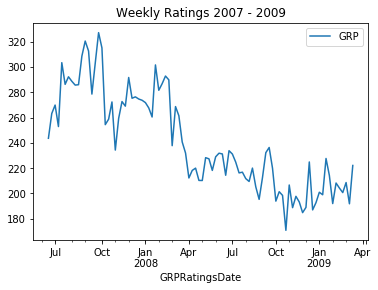

,GRP
GRPRatingsDate,
2009-02-15,204.20
2009-02-22,200.61
2009-03-01,208.56
2009-03-08,191.74
2009-03-15,222.07


In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import os
import matplotlib
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import math

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


os.chdir('/Users/pierlim/PycharmProjects/Indian_TV_Time_Series')
df = pd.read_csv("./data/ActualRatings_weeklyGRP.csv")
df = df.drop(df.columns[2], axis=1)
split_str = df['GRPRatingsDate'].str.split('(')
df['GRPRatingsDate'] = split_str.str[0]
df['GRPRatingsDate'] = pd.to_datetime(df['GRPRatingsDate'])

df = df.set_index('GRPRatingsDate')
df.plot()
plt.title('Weekly Ratings 2007 - 2009')
plt.show()
df.tail()

In [99]:
# Get train test
df_train = df[:'2008-10-26']
print(df_train.tail())
print(df_train.shape)

                   GRP
GRPRatingsDate        
2008-09-28      219.91
2008-10-05      193.84
2008-10-12      201.30
2008-10-19      198.40
2008-10-26      170.74
(72, 1)


In [100]:
df_test = df['2008-11-1':]
print(df_test.head())
print(df_test.shape)


                   GRP
GRPRatingsDate        
2008-11-02      206.61
2008-11-09      188.68
2008-11-16      197.64
2008-11-23      193.16
2008-11-30      184.74
(20, 1)


In [101]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
    
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

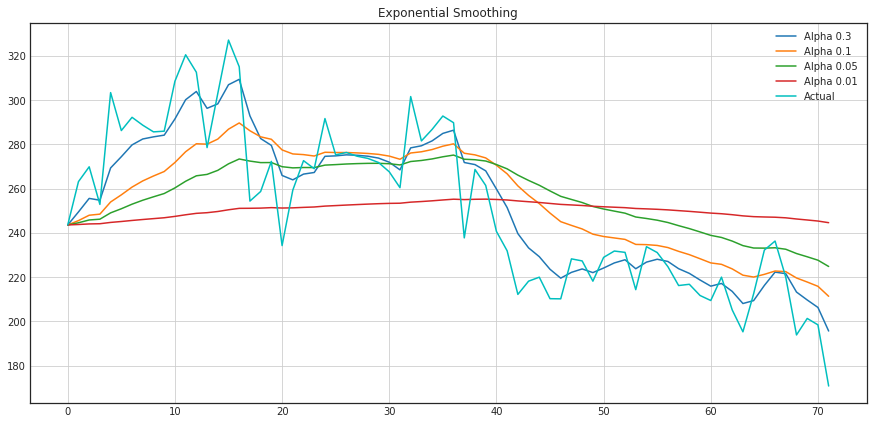

In [102]:
plotExponentialSmoothing(df_train['GRP'], [0.3, 0.1, 0.05, 0.01])

In [103]:
# Choose 0.3 as alpha
yhat = exponential_smoothing(df_train['GRP'], 0.3)

In [104]:
yhat[-1]

def exponential_smoothing_predict_forward(last_train, alpha, predict_len):
    result = []
    for n in range(predict_len):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result



## Simple Exponential Smoothing

In [105]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

In [106]:
fit2 = SimpleExpSmoothing(np.asarray(df_train['GRP'])).fit(smoothing_level=0.3,optimized=False)
df_forecast = df_test
df_forecast['forecast'] = fit2.forecast(len(df_test))
df_forecast = df_forecast.drop('GRP', axis=1)
print(df_forecast)

                  forecast
GRPRatingsDate            
2008-11-02      195.616892
2008-11-09      195.616892
2008-11-16      195.616892
2008-11-23      195.616892
2008-11-30      195.616892
2008-12-07      195.616892
2008-12-14      195.616892
2008-12-21      195.616892
2008-12-28      195.616892
2009-01-04      195.616892
2009-01-11      195.616892
2009-01-18      195.616892
2009-01-25      195.616892
2009-02-01      195.616892
2009-02-08      195.616892
2009-02-15      195.616892
2009-02-22      195.616892
2009-03-01      195.616892
2009-03-08      195.616892
2009-03-15      195.616892


/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


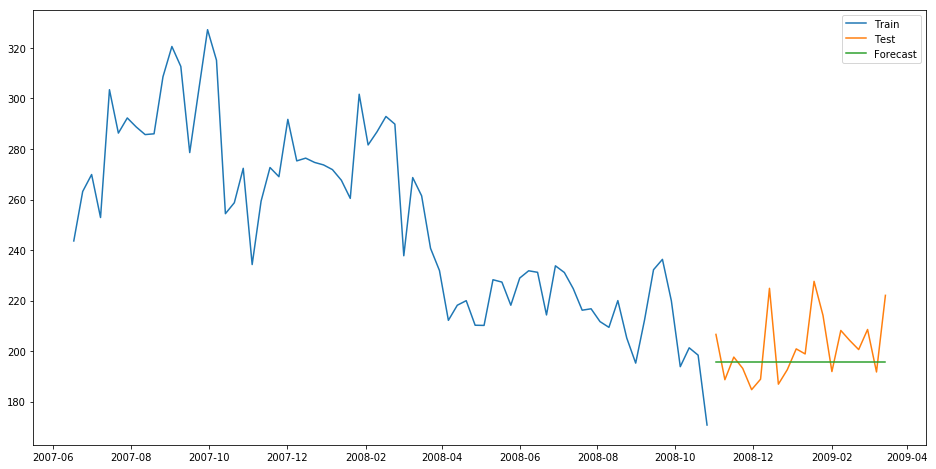

In [107]:
plt.figure(figsize=(16,8))
plt.plot(df_train['GRP'], label='Train')
plt.plot(df_test['GRP'], label='Test')
plt.plot(df_forecast['forecast'], label='Forecast')
plt.legend(loc='best')
plt.show()

In [108]:
mae = mean_absolute_error(df_test['GRP'], df_forecast['forecast'])
mse = mean_squared_error(df_test['GRP'], df_forecast['forecast'])
print('Prediction quality: {:.2f} MSE ({:.2f} RMSE),  ({:.2f} MAE)'.format(mse, math.sqrt(mse), mae))
mape = mean_absolute_percentage_error(df_test['GRP'], df_forecast['forecast'])
print('Prediction quality: {:.2f}% MAPE '.format(mape))

Prediction quality: 191.98 MSE (13.86 RMSE),  (10.65 MAE)
Prediction quality: 5.09% MAPE 


In [109]:
fit1 = Holt(np.asarray(df_train['GRP'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
df_forecast = df_test
df_forecast['forecast'] = fit1.forecast(len(df_test))
df_forecast = df_forecast.drop('GRP', axis=1)
print(df_forecast)

                  forecast
GRPRatingsDate            
2008-11-02      191.194288
2008-11-09      188.923790
2008-11-16      186.653293
2008-11-23      184.382795
2008-11-30      182.112297
2008-12-07      179.841800
2008-12-14      177.571302
2008-12-21      175.300805
2008-12-28      173.030307
2009-01-04      170.759810
2009-01-11      168.489312
2009-01-18      166.218815
2009-01-25      163.948317
2009-02-01      161.677820
2009-02-08      159.407322
2009-02-15      157.136824
2009-02-22      154.866327
2009-03-01      152.595829
2009-03-08      150.325332
2009-03-15      148.054834


/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


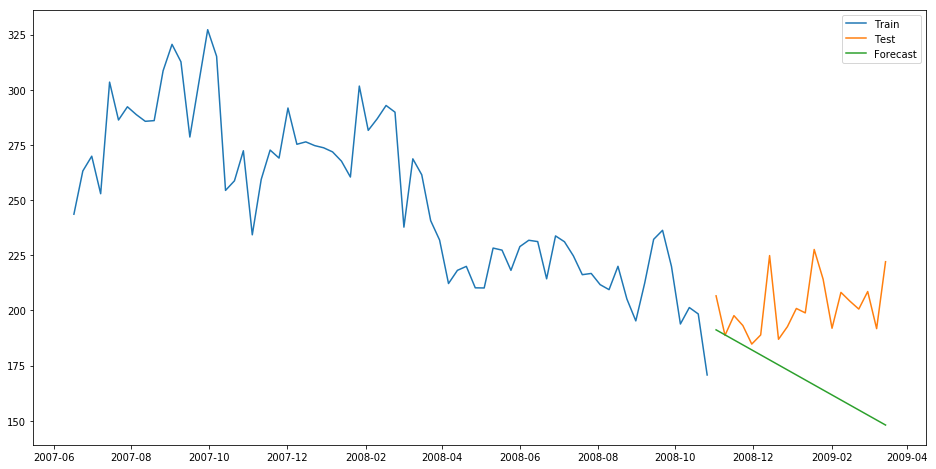

In [110]:
plt.figure(figsize=(16,8))
plt.plot(df_train['GRP'], label='Train')
plt.plot(df_test['GRP'], label='Test')
plt.plot(df_forecast['forecast'], label='Forecast')
plt.legend(loc='best')
plt.show()

In [111]:
mae = mean_absolute_error(df_test['GRP'], df_forecast['forecast'])
mse = mean_squared_error(df_test['GRP'], df_forecast['forecast'])
print('Prediction quality: {:.2f} MSE ({:.2f} RMSE),  ({:.2f} MAE)'.format(mse, math.sqrt(mse), mae))
mape = mean_absolute_percentage_error(df_test['GRP'], df_forecast['forecast'])
print('Prediction quality: {:.2f}% MAPE '.format(mape))

Prediction quality: 1466.18 MSE (38.29 RMSE),  (32.04 MAE)
Prediction quality: 15.44% MAPE 


Observation here is that the holt's winter method does anticipate the trend of going downwards generally, but the reality is that the ratings from November 2008 onwards took a small upturn.

## Holt's Winter Method

In [112]:
fit1 = ExponentialSmoothing(np.asarray(df_train['GRP']) ,seasonal_periods=5 ,trend='add', seasonal='add',).fit()
df_forecast = df_test
df_forecast['forecast'] = fit1.forecast(len(df_test))
df_forecast = df_forecast.drop('GRP', axis=1)
print(df_forecast)

                  forecast
GRPRatingsDate            
2008-11-02      175.154773
2008-11-09      169.703979
2008-11-16      180.688872
2008-11-23      179.001872
2008-11-30      181.025914
2008-12-07      175.154773
2008-12-14      169.703979
2008-12-21      180.688872
2008-12-28      179.001872
2009-01-04      181.025914
2009-01-11      175.154773
2009-01-18      169.703979
2009-01-25      180.688872
2009-02-01      179.001872
2009-02-08      181.025914
2009-02-15      175.154773
2009-02-22      169.703979
2009-03-01      180.688872
2009-03-08      179.001872
2009-03-15      181.025914


/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


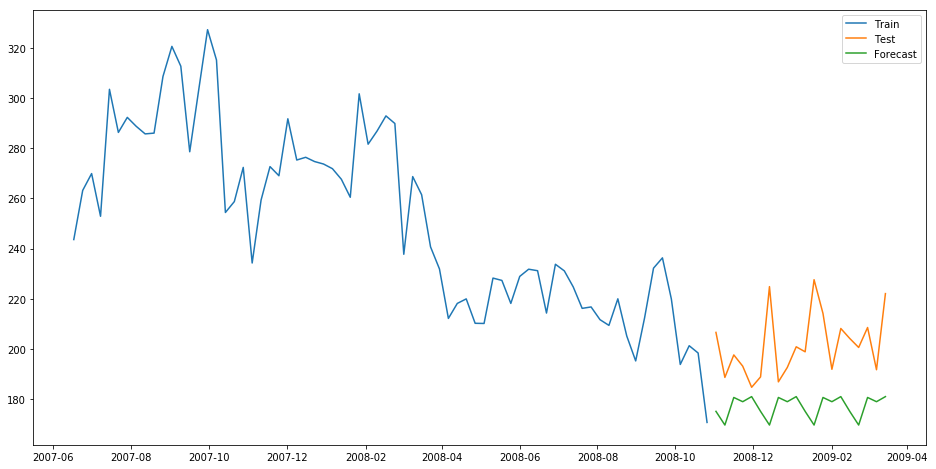

In [113]:
plt.figure(figsize=(16,8))
plt.plot(df_train['GRP'], label='Train')
plt.plot(df_test['GRP'], label='Test')
plt.plot(df_forecast['forecast'], label='Forecast')
plt.legend(loc='best')
plt.show()

In [114]:
mae = mean_absolute_error(df_test['GRP'], df_forecast['forecast'])
mse = mean_squared_error(df_test['GRP'], df_forecast['forecast'])
print('Prediction quality: {:.2f} MSE ({:.2f} RMSE),  ({:.2f} MAE)'.format(mse, math.sqrt(mse), mae))
mape = mean_absolute_percentage_error(df_test['GRP'], df_forecast['forecast'])
print('Prediction quality: {:.2f}% MAPE '.format(mape))

Prediction quality: 803.06 MSE (28.34 RMSE),  (24.53 MAE)
Prediction quality: 11.81% MAPE 


Observation here is that the holt's winter method does anticipate the trend of going downwards generally, but the reality is that the ratings from November 2008 onwards took a small upturn. 